## Project Phase 3 - Clustering Pipeline

#### Import Modules

In [1]:
from pathlib import Path
import os
import sys
import time
import warnings

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/leon/Documents/Repos/Gesture-Recognition-Reading-Muscle-Activity


In [3]:
import utils.processing as processing
import utils.clustering as clustering

In [4]:
warnings.filterwarnings("ignore")

#### Set up to time script run time

In [5]:
start = time.time()

#### Configuration

In [6]:
RANDOM_SEED = 42

DESIGN_FILE_PATH = 'data/emg_design.csv'
TARGET_ATTR = 'gesture class (0-3)'

In [7]:
# Attr list from phase_2
NUMERICAL_ATTRS = ['muscle reading 1 sensor 1', 'muscle reading 1 sensor 2', 'muscle reading 1 sensor 3', 'muscle reading 1 sensor 4', 'muscle reading 1 sensor 5', 'muscle reading 1 sensor 6', 'muscle reading 1 sensor 7', 'muscle reading 1 sensor 8', 'muscle reading 2 sensor 1', 'muscle reading 2 sensor 2', 'muscle reading 2 sensor 3', 'muscle reading 2 sensor 4', 'muscle reading 2 sensor 5', 'muscle reading 2 sensor 6', 'muscle reading 2 sensor 7', 'muscle reading 2 sensor 8', 'muscle reading 3 sensor 1', 'muscle reading 3 sensor 2', 'muscle reading 3 sensor 3', 'muscle reading 3 sensor 4', 'muscle reading 3 sensor 5', 'muscle reading 3 sensor 6', 'muscle reading 3 sensor 7', 'muscle reading 3 sensor 8', 'muscle reading 4 sensor 1', 'muscle reading 4 sensor 2', 'muscle reading 4 sensor 3', 'muscle reading 4 sensor 4', 'muscle reading 4 sensor 5', 'muscle reading 4 sensor 6', 'muscle reading 4 sensor 7', 'muscle reading 4 sensor 8', 'muscle reading 5 sensor 1', 'muscle reading 5 sensor 2', 'muscle reading 5 sensor 3', 'muscle reading 5 sensor 4', 'muscle reading 5 sensor 5', 'muscle reading 5 sensor 6', 'muscle reading 5 sensor 7', 'muscle reading 5 sensor 8', 'muscle reading 6 sensor 1', 'muscle reading 6 sensor 2', 'muscle reading 6 sensor 3', 'muscle reading 6 sensor 4', 'muscle reading 6 sensor 5', 'muscle reading 6 sensor 6', 'muscle reading 6 sensor 7', 'muscle reading 6 sensor 8', 'muscle reading 7 sensor 1', 'muscle reading 7 sensor 2', 'muscle reading 7 sensor 3', 'muscle reading 7 sensor 4', 'muscle reading 7 sensor 5', 'muscle reading 7 sensor 6', 'muscle reading 7 sensor 7', 'muscle reading 7 sensor 8', 'muscle reading 8 sensor 1', 'muscle reading 8 sensor 2', 'muscle reading 8 sensor 3', 'muscle reading 8 sensor 4', 'muscle reading 8 sensor 5', 'muscle reading 8 sensor 6', 'muscle reading 8 sensor 7', 'muscle reading 8 sensor 8']
NOMINAL_ATTRS = []

#### Import Data File

In [8]:
df = pd.read_csv(DESIGN_FILE_PATH)
print(df.shape)
df.head()

(11678, 65)


,id,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,...,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


#### Apply the preprocessing pipeline built in phase_2 to the data frame

In [9]:
preprocessor = processing.get_default_preprocessor(NUMERICAL_ATTRS, NOMINAL_ATTRS)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['muscle reading 1 sensor 1',
                                  'muscle reading 1 sensor 2',
                                  'muscle reading 1 sensor 3',
                                  'muscle reading 1 sensor 4',
                                  'muscle reading 1 sensor 5',
                                  'muscle reading 1 sensor 6',
                                  'muscle reading 1 sensor 7',
                                  'muscle reading 1 sensor 8',
                                  'muscle reading 2 sensor 1...
                                  'muscle reading 3 sensor 7',
                                  'muscle reading 3 sensor 8',
                                  'muscle reading 4 sensor 1',
                                  'muscle reading 4 sensor 2',
                                  'muscle reading 4 sensor 3',
                                  'muscle reading 4 sensor 4',
                                  'muscle reading 4 sensor 5',
                                  'muscle reading 4 sensor 6', ...]),
                                ('nominal',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHot_encoder',
                                                  OneHotEncoder()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 [])])

In [10]:
df_transformed = pd.DataFrame(
    data=preprocessor.fit_transform(df), 
    columns=NUMERICAL_ATTRS + NOMINAL_ATTRS
)
print(df_transformed.shape)
df_transformed.head()

(11678, 64)


,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,...,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,1.428445,0.401724,1.150179,1.173139,-0.047110,-0.482211,-4.293826,-4.240470,-0.459858,0.224160,...,0.894454,-1.785637,3.396947,0.394898,1.764490,0.772653,0.232428,-0.259303,-2.278454,1.069524
1,-2.503492,-0.448155,-0.853937,-0.842622,0.737220,-0.017247,1.445765,-0.606050,0.588529,-0.282565,...,-4.087375,-1.587727,2.627872,0.561499,1.362038,0.772653,0.736892,0.836588,4.451912,1.005130
2,-0.995352,-0.618131,-1.455172,-0.977006,-1.167581,-0.210982,-3.098077,0.821758,0.036746,0.477522,...,-4.996756,-5.414002,0.430515,0.644800,0.355910,-0.987888,0.400583,0.836588,4.570683,3.130128
3,0.135753,0.316736,0.148121,0.366835,0.008913,0.873935,4.275702,-0.865651,-0.846106,-0.113656,...,-2.070920,-2.445340,-0.558296,0.394898,1.563264,1.585211,1.857924,1.541089,4.768635,2.808159
4,0.351202,0.061772,0.148121,-0.170702,-0.775416,0.408971,-1.982046,0.367456,0.422994,0.055252,...,2.436448,2.568400,-1.876710,-0.604712,0.557136,0.908079,-0.720448,-0.924666,-4.376745,-4.403956


#### Add a default UMAP manifold learning / dimensionality reduction stage to the preprocessing pipeline built in Phase 2

In [11]:
umap_results_dict = clustering.umap_dim_red(df_transformed)
umap_results_dict

{'embedding': array([[2.515732 , 2.902599 ],
        [2.7311401, 2.4800472],
        [2.875983 , 2.6351442],
        ...,
        [7.8843737, 3.948777 ],
        [7.2207894, 5.51327  ],
        [7.795226 , 3.8117583]], dtype=float32),
 'n_neighbors': 15,
 'min_dist': 0.1,
 'metric': 'euclidean',
 'n_components': 2,
 'trustworthiness': 0.5984225899981406}

#### Test the new pipeline

In [12]:
embedding = umap_results_dict['embedding']
print(embedding.shape)
print(embedding[:5, :])

(11678, 2)
[[2.515732  2.902599 ]
 [2.7311401 2.4800472]
 [2.875983  2.6351442]
 [2.6403432 3.2058563]
 [3.2799847 5.0749702]]


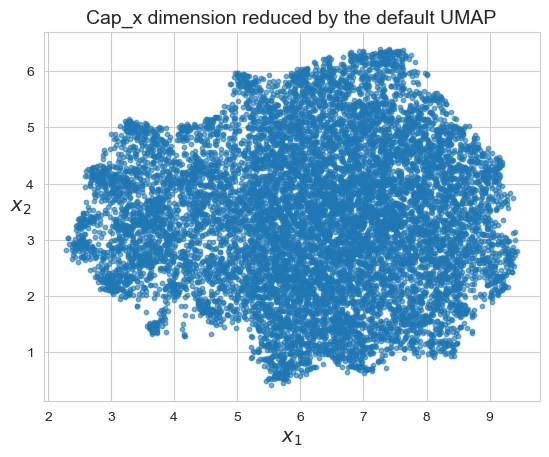

In [13]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, alpha=0.6)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', rotation=0, fontsize=14)
plt.title('Cap_x dimension reduced by the default UMAP', fontsize=14)
plt.show()

#### Add a default K-means or DBSCAN clustering stage to the pipeline built above

In [14]:
clustering_results_dict = clustering.clustering(umap_results_dict)
clustering_results_dict

Succeed to find an elbow at 5 in the inertia curve
Elbow slope change test passed
n_clusters_db_score_is_min=13
n_clusters_ch_score_is_max=12
n_clusters_silhouette_score_is_max=3
K-Means first test failed
K-Means second test failed

Try applying DBSCAN method:
   index  k       eps
0  11315  3  0.082374
1  11241  4  0.089860
2  11421  5  0.106862
3  11381  6  0.113438
max_eps: 0.11343775325204986, min_samples: 6
Succeed to find n_clusters=3, eps=0.10209397792684485, min_samples=6


{'algo': 'dbscan',
 'eps': 0.10209397792684485,
 'dbscan_min_samples': 6,
 'n_clusters_found': 3,
 'validity_index': -0.7746039893882654,
 'hopkins_statistic': 0.45048635619881144,
 'umap_n_neighbors': 15,
 'umap_min_dist': 0.1,
 'umap_metric': 'euclidean',
 'umap_n_components': 2,
 'trustworthiness': 0.5984225899981406,
 'fitted_dbscan': DBSCAN(eps=0.10209397792684485, min_samples=6),
 'embedding': array([[2.515732 , 2.902599 ],
        [2.7311401, 2.4800472],
        [2.875983 , 2.6351442],
        ...,
        [7.8843737, 3.948777 ],
        [7.2207894, 5.51327  ],
        [7.795226 , 3.8117583]], dtype=float32),
 'cluster_labels': array([0, 0, 0, ..., 0, 0, 0])}

#### Test the new pipeline

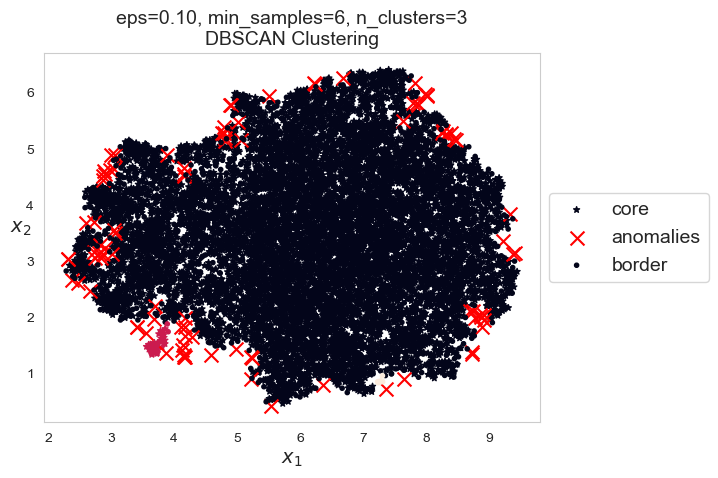

In [15]:
try:
    fitted_kmeans = clustering_results_dict['fitted_k_means']
    clustering.plot_k_means(fitted_kmeans, embedding)
except KeyError:
    fitted_dbscan = clustering_results_dict['fitted_dbscan']
    clustering.plot_dbscan(fitted_dbscan, embedding)

#### The silhouette_score_or_validity_index of the default model can be used as a baseline for following optimization process

In [16]:
silhouette_score_or_validity_index = clustering_results_dict['silhouette_score'] if clustering_results_dict['algo'] == 'k_means' else clustering_results_dict['validity_index']
silhouette_score_or_validity_index

-0.7746039893882654

#### Time to run script

In [17]:
end = time.time()
print(f'script run time: {(end - start)/60} minutes')

script run time: 4.362508153915405 minutes
